In [1]:
# import libraris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read data
df = pd.read_excel("D:\\project\\agridata\\ICRISAT_District_Level_Data.xlsx")

# Data clean

# find null values
Find_null_values = pd.DataFrame(df.isnull().sum())
Find_null_values.to_excel("C:\\Users\\Lenovo\\Desktop\\missing_values.xlsx", engine="openpyxl")
print(f"\n num of null values :{Find_null_values}")

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Get summary statistics
print("\nSummary Statistics:")
print(df.describe(include="all"))

# # Convert text uniformity.
df.columns = df.columns.str.replace(r"\(1000 ha\)|\(1000 tons\)|\(Kg per ha\)", "", regex=True).str.strip()
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ","_")
print(f"\n Convert text uniformity.: {df.columns}")



 num of null values :                                      0
Dist Code                             0
Year                                  0
State Code                            0
State Name                            0
Dist Name                             0
...                                  ..
VEGETABLES AREA (1000 ha)             0
FRUITS AND VEGETABLES AREA (1000 ha)  0
POTATOES AREA (1000 ha)               0
ONION AREA (1000 ha)                  0
FODDER AREA (1000 ha)                 0

[80 rows x 1 columns]

Number of duplicate rows: 0

Summary Statistics:
           Dist Code          Year    State Code     State Name Dist Name  \
count   16146.000000  16146.000000  16146.000000          16146     16146   
unique           NaN           NaN           NaN             20       311   
top              NaN           NaN           NaN  Uttar Pradesh      Gaya   
freq             NaN           NaN           NaN           2392        52   
mean      269.769231   1991.496841      

In [3]:
df.to_csv("D:\\project\\agridata\\cleaned_data.csv", index=False)

Q1) Top 7 RICE PRODUCTION State Data(Bar_plot)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7396\3334525072.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='rice_production', x='state_name', data=df_top7, palette='viridis')


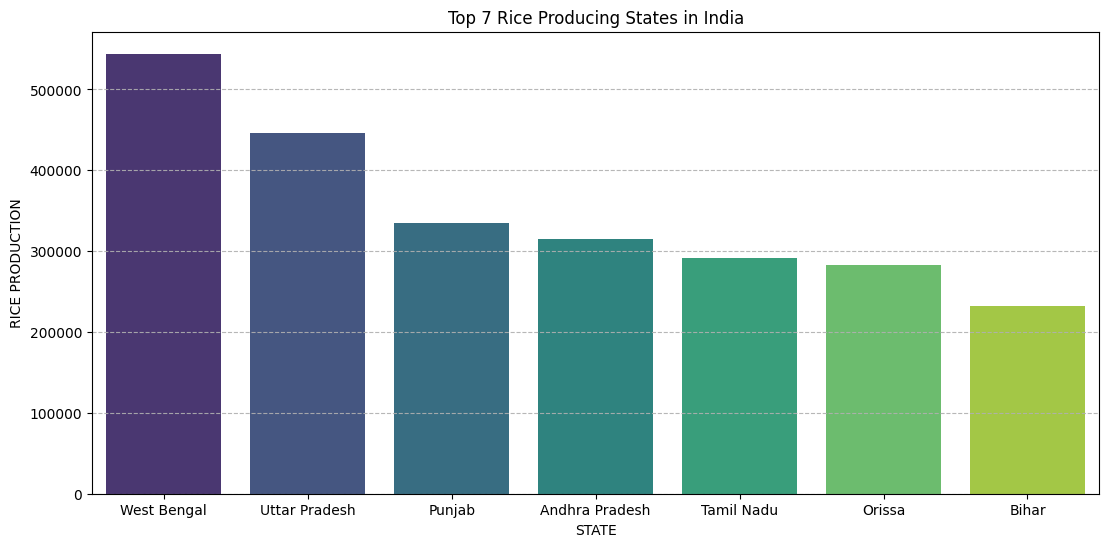

In [ ]:


# Grouping by state and summing production
group_state = df.groupby('state_name', as_index=False)['rice_production'].sum()

# Sorting and selecting top 7 states
df_top7 = group_state.sort_values(by='rice_production', ascending=False).head(7)

# Plotting
plt.figure(figsize=(13, 6))
sns.barplot(y='rice_production', x='state_name', data=df_top7, palette='viridis')
plt.ylabel("RICE PRODUCTION")
plt.xlabel('STATE')
plt.title("Top 7 Rice Producing States in India")
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

Q2) Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7396\2855738515.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "state_name", y = "wheat_production", data=top_5, palette="pastel")


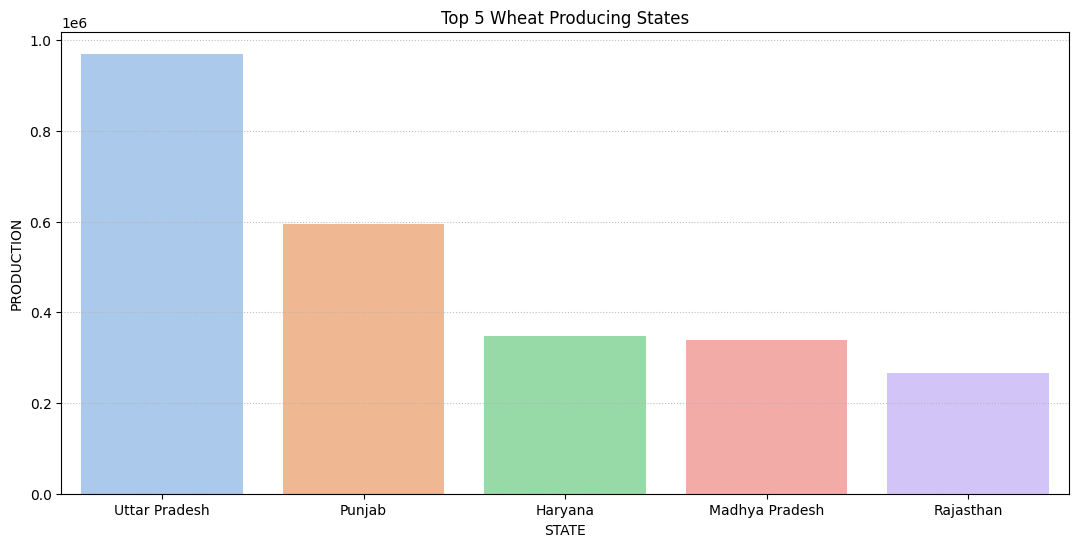

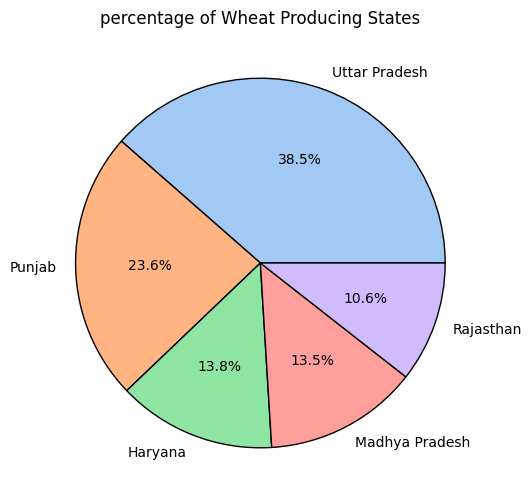

In [ ]:
# Bar chart

# Grouping by state and summing production
group_state = df.groupby("state_name", as_index= False)["wheat_production"].sum()
top_5 = group_state.sort_values("wheat_production", ascending= False).head(5)

# get percentage
product_percentage = (top_5["wheat_production"] / top_5["wheat_production"].sum())*100

# Bar chart
plt.figure(figsize=(13, 6))
sns.barplot(x = "state_name", y = "wheat_production", data=top_5, palette="pastel")

plt.xlabel("STATE")
plt.ylabel("PRODUCTION")
plt.title("Top 5 Wheat Producing States")
plt.grid(axis="y", linestyle=':', alpha = 0.8 )
plt.show()

# Pie chat
plt.figure(figsize=(6,6))

plt.pie(product_percentage,
    autopct='%1.1f%%',
    labels=top_5["state_name"],
    colors=sns.color_palette("pastel"),
    wedgeprops={"edgecolor": "black", "linewidth": 1})
plt.title("percentage of Wheat Producing States")
plt.show()

 Q3 Oil seed production by top 5 states


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10736\3043142189.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y = "state_name", x = "oilseeds_production", data=top_5, palette="mako")


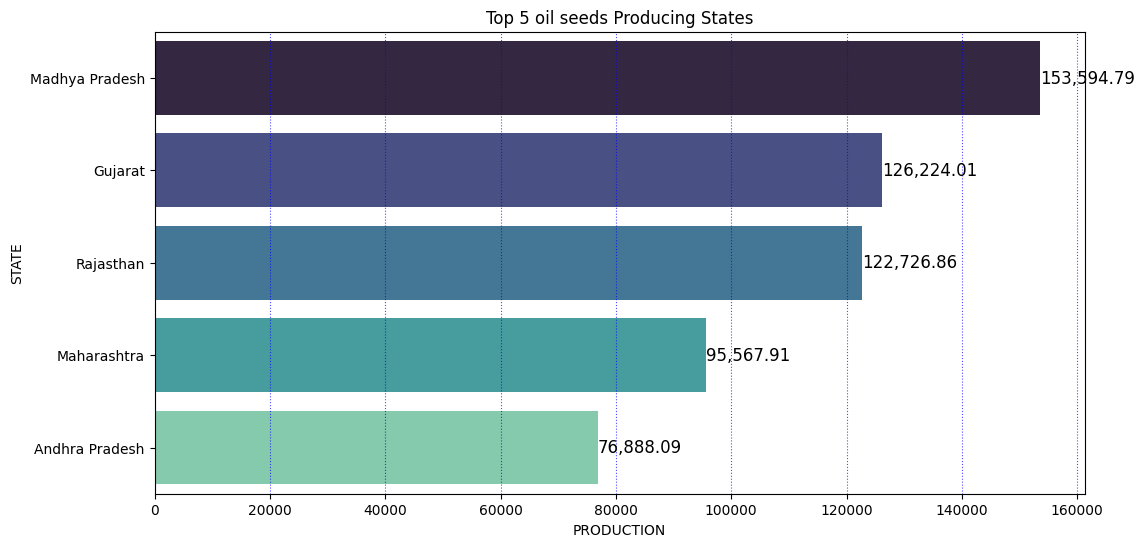

In [ ]:

group_state = df.groupby("state_name", as_index= False)["oilseeds_production"].sum()
top_5 = group_state.sort_values("oilseeds_production", ascending= False).head(5)

# Bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(y = "state_name", x = "oilseeds_production", data=top_5, palette="mako")

# Annotate each bar with its value
for index, value in enumerate(top_5["oilseeds_production"]):
    ax.text(value, index, f"{value:,}", va='center', ha='left', fontsize=12, color='black')

plt.ylabel("STATE")
plt.xlabel("PRODUCTION")
plt.title("Top 5 oil seeds Producing States")
plt.grid(axis="x", linestyle=':', alpha = 0.7, color = "blue" )
plt.show()

Q4) Top 7 SUNFLOWER PRODUCTION  State

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10736\1199900385.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(y = "state_name", x = "sunflower_production", data=top_7, palette="Spectral")


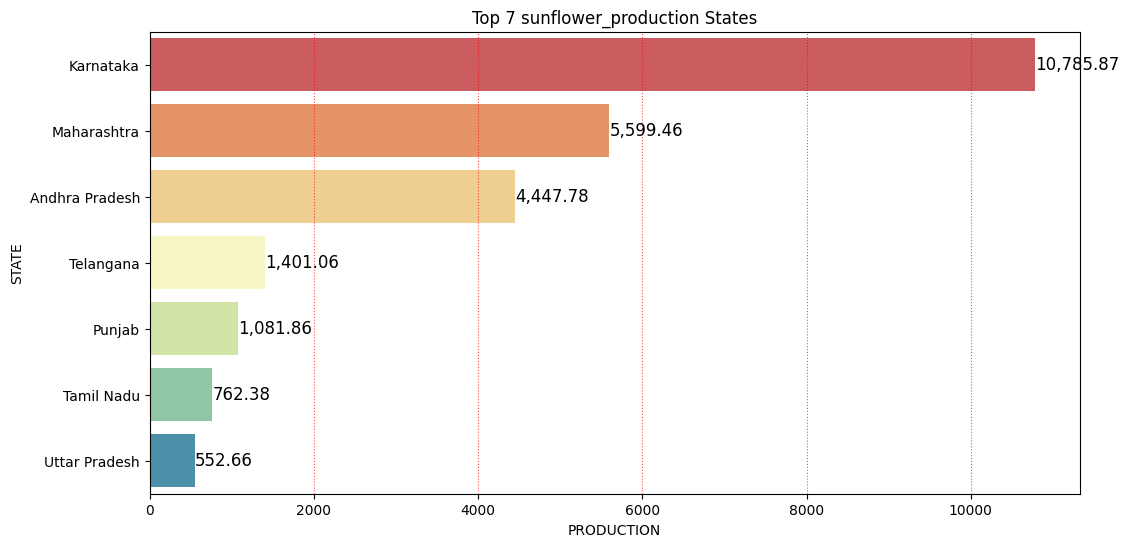

In [ ]:

group_state = df.groupby("state_name", as_index= False)["sunflower_production"].sum()
top_7 = group_state.sort_values("sunflower_production", ascending= False).head(7)

# Bar chart 
plt.figure(figsize=(12, 6))
ax= sns.barplot(y = "state_name", x = "sunflower_production", data=top_7, palette="Spectral")

# Annotate each bar with its value
for index, value in enumerate(top_7["sunflower_production"]):
    ax.text(value, index, f"{value:,}", va='center', ha='left', fontsize=12, color='black')

plt.ylabel("STATE")
plt.xlabel("PRODUCTION")
plt.title("Top 7 sunflower_production States")
plt.grid(axis="x", linestyle=':', alpha = 0.7, color = "red" )
plt.show()

Q5) India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)

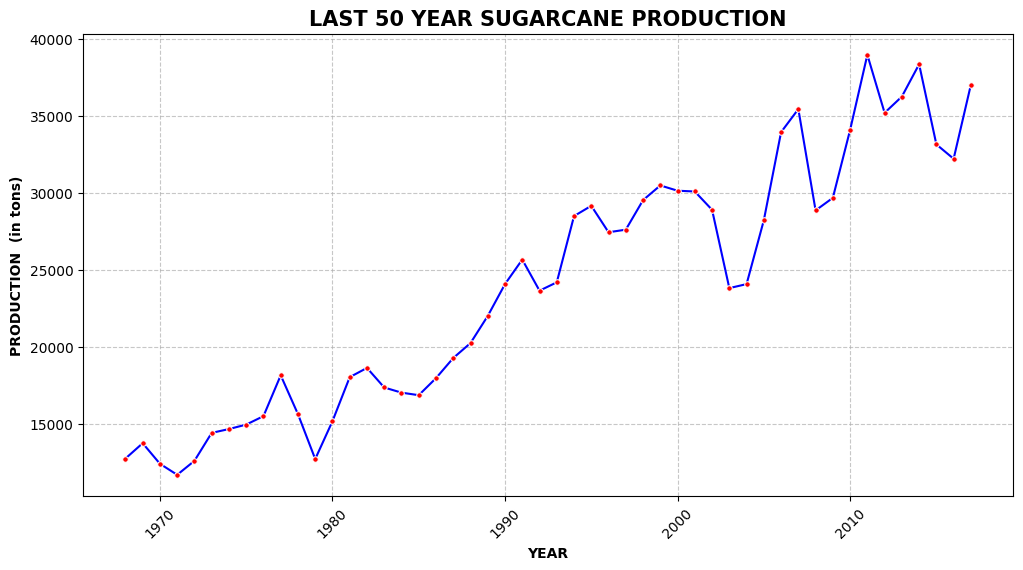

In [ ]:

group_year = df.groupby("year", as_index= False)["sugarcane_production"].sum()
get_50_year = group_year.sort_values("year", ascending= False).head(50)

# Line plot
plt.figure(figsize= (12,6))
sns.lineplot(data=get_50_year, x= "year", y= "sugarcane_production",
            marker=".",markersize = 8,markerfacecolor = "red",
            color = "blue")
plt.xlabel("YEAR", fontsize = 10, weight = "bold")
plt.ylabel("PRODUCTION  (in tons)", fontsize = 10, weight = "bold")
plt.title("LAST 50 YEAR SUGARCANE PRODUCTION", fontsize = 15, weight = "bold")
plt.grid(linestyle = "--", alpha = 0.7)
plt.xticks(rotation = 45)
plt.show()



Q6) Rice Production Vs Wheat Production (Last 50y)


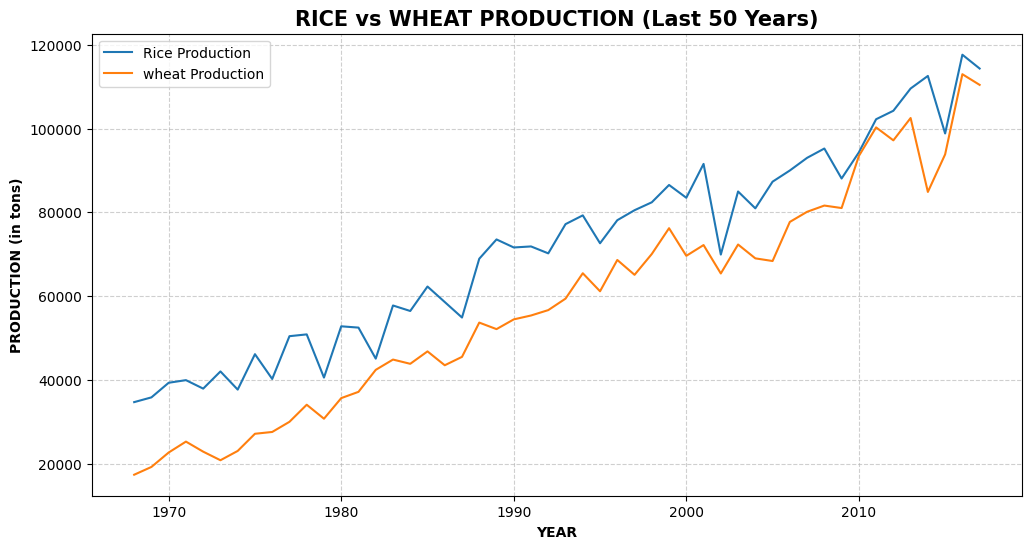

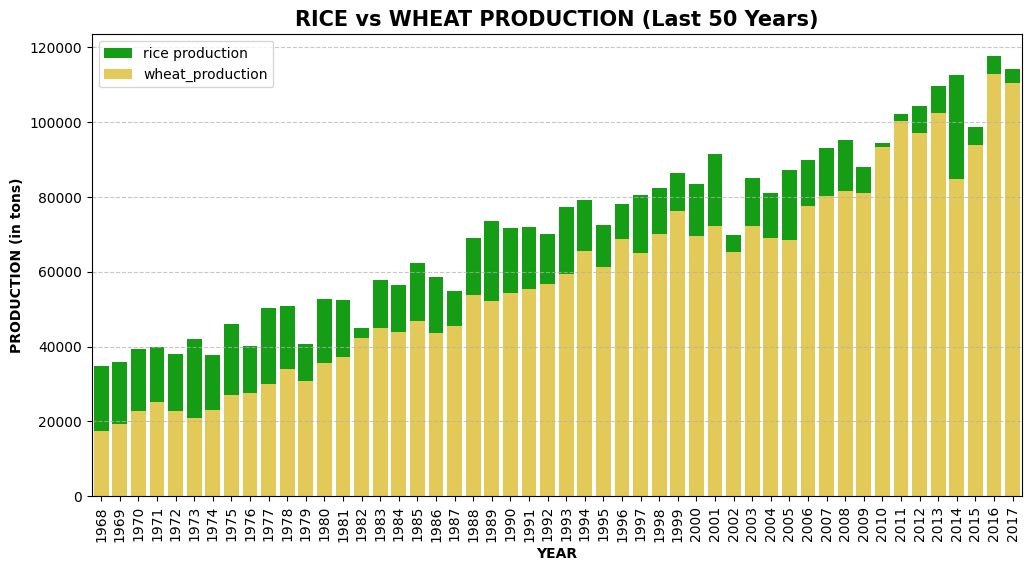

In [ ]:
# Grouping by year and summing rice and wheat production
group_year = df.groupby("year", as_index=False)[["rice_production", "wheat_production"]].sum()

# Getting the last 50 years
get_50_year = group_year.sort_values("year", ascending=False).head(50)


# line plot
plt.figure(figsize=(12, 6))
plt.plot(get_50_year["year"], get_50_year["rice_production"],label="Rice Production")
plt.plot(get_50_year["year"], get_50_year["wheat_production"], label="wheat Production")
plt.xlabel("YEAR", fontsize=10, weight="bold")
plt.ylabel("PRODUCTION (in tons)", fontsize=10, weight="bold")
plt.title("RICE vs WHEAT PRODUCTION (Last 50 Years)", fontsize=15, weight="bold")
plt.legend()
plt.grid(linestyle = '--', alpha = 0.6)
plt.show()

# barplot

plt.figure(figsize=(12,6))
sns.barplot(data = get_50_year, x= "year", y = "rice_production", color = "#00b300",label = "rice production") # using HCX color
sns.barplot(data = get_50_year, x= "year", y = "wheat_production", color= (250/255,216/255, 65/255), label = "wheat_production") # uging RGB color
plt.xlabel("YEAR", fontsize=10, weight="bold")
plt.ylabel("PRODUCTION (in tons)", fontsize=10, weight="bold")
plt.title("RICE vs WHEAT PRODUCTION (Last 50 Years)", fontsize=15, weight="bold")
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

 Q7) Rice Production By West Bengal Districts

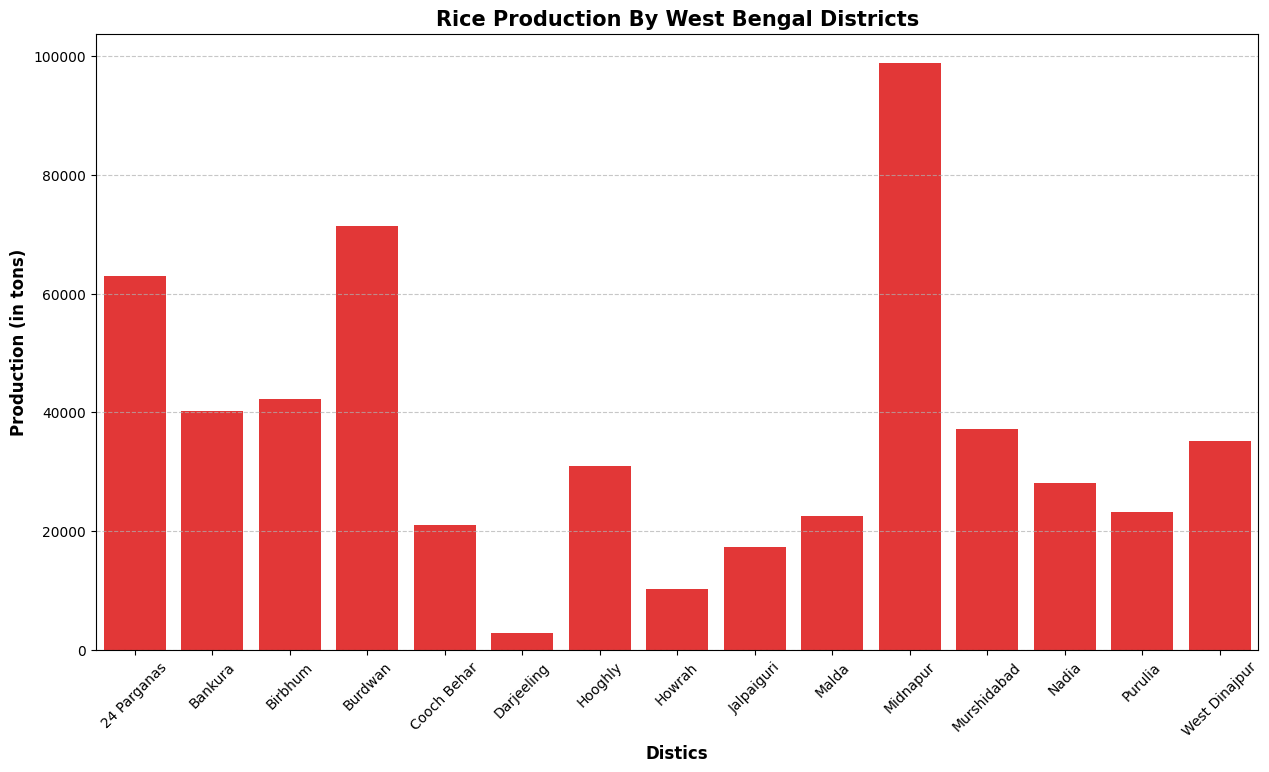

In [ ]:


group_dist = df.groupby(["state_name","dist_name"], as_index= False)["rice_production"].sum()
filtered_dist = group_dist[group_dist["state_name"]=="West Bengal"]

# plot
plt.figure(figsize=(15,8))
sns.barplot(data=filtered_dist, x = "dist_name", y="rice_production",color="#ff1a1a")
plt.title("Rice Production By West Bengal Districts", weight = "bold",fontsize=15)
plt.xlabel("Distics",fontsize=12, weight = "bold")
plt.ylabel("Production (in tons)",fontsize=12, weight = "bold")
plt.xticks(rotation = 45)
plt.grid(axis="y", alpha = 0.7, linestyle = "--"  )


 Q8) Top 10 Wheat Production Years From UP

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8156\3674238662.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_state["color"] = filtered_state["year"].apply(lambda x: "red" if x in top_10_years else "gray")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8156\3674238662.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_state, x="year", y="wheat_production",


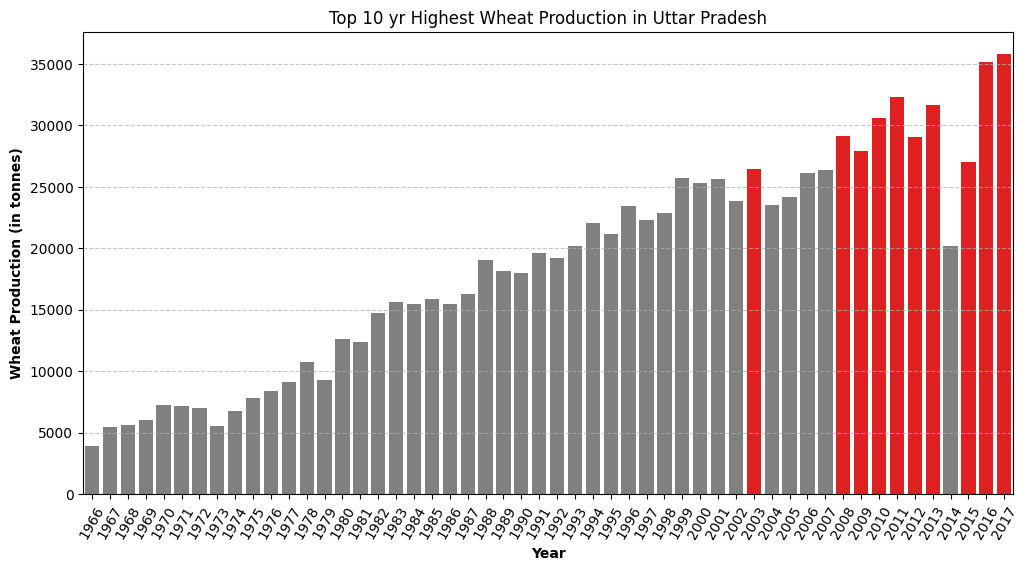

In [ ]:


# Grouping wheat production by year and state
group_dist = df.groupby(["year", "state_name"], as_index=False)["wheat_production"].sum()

# Filtering only Uttar Pradesh data
filtered_state = group_dist[group_dist["state_name"].str.lower() == "uttar pradesh"]

# Get the top 10 production years
top_10_years = filtered_state.nlargest(10, "wheat_production")["year"].values

# Create a color mapping: Top 10 years in red, others in gray
filtered_state["color"] = filtered_state["year"].apply(lambda x: "red" if x in top_10_years else "gray")

# Create a dictionary mapping each year to its color
color_dict = dict(zip(filtered_state["year"], filtered_state["color"]))

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_state, x="year", y="wheat_production", 
            palette=[color_dict[year] for year in filtered_state["year"]])  # Use mapped colors

plt.title("Top 10 yr Highest Wheat Production in Uttar Pradesh")
plt.xlabel("Year", weight = "bold")
plt.ylabel("Wheat Production (in tonnes)",weight = "bold")
plt.xticks(rotation=60)
plt.grid(linestyle="--", axis="y", alpha=0.7)

# Show plot
plt.show()


Q9 )  Millet Production (Last 50y)

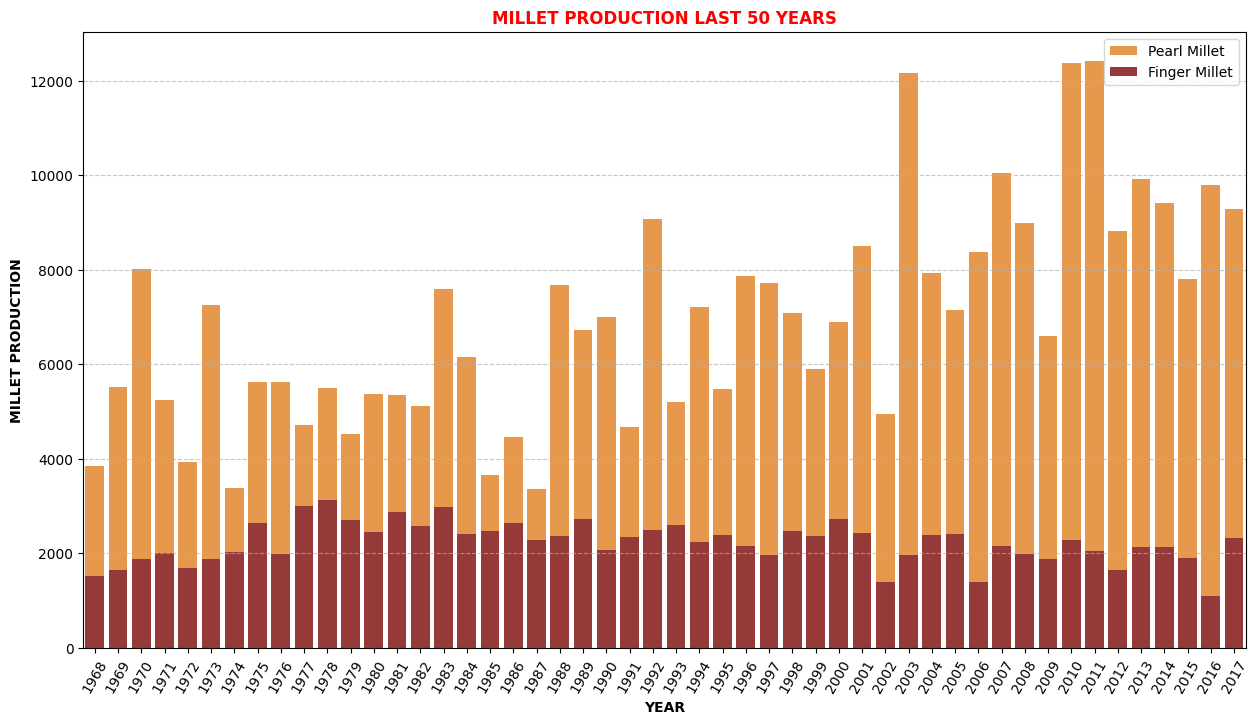

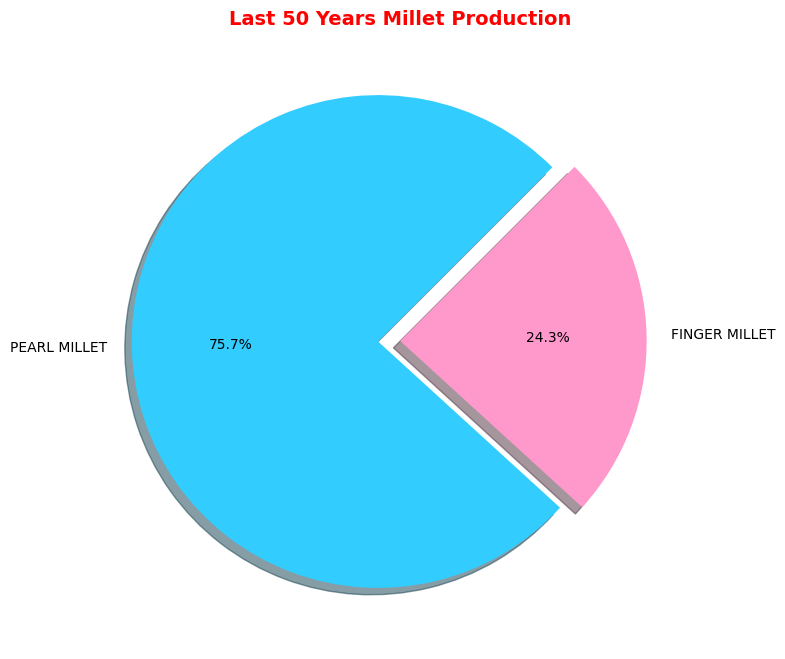

In [96]:
# filter millet columns
millet_col = df.filter(like="millet_production", axis=1).columns

# group the year and sort last 50 years
group_year = df.groupby("year", as_index= False)[millet_col].sum()
get_50_year = group_year.sort_values("year", ascending=False).head(50)

millet_total = get_50_year[millet_col].sum()

# barchar
plt.figure(figsize=(15,8))
sns.barplot(data=get_50_year, x="year",y="pearl_millet_production", label = "Pearl Millet",color="#ff9933")
sns.barplot(data=get_50_year, x="year",y="finger_millet_production",label = "Finger Millet",color="brown")
plt.title("MILLET PRODUCTION LAST 50 YEARS", fontsize = 12, weight = "bold", color = "red")
plt.xlabel("YEAR", fontsize ="10", weight = "bold")
plt.ylabel("MILLET PRODUCTION", fontsize ="10", weight = "bold")
plt.grid(linestyle="--", axis="y", alpha=0.7)
plt.xticks(rotation=60)
plt.show()

# Pie chart
explode_value = [0.09]+[0]
my_color = ["#33ccff", "#ff99cc"]
my_lablel = ["PEARL MILLET",'FINGER MILLET']

plt.figure(figsize=(8,8))
plt.pie(millet_total, autopct='%1.1f%%',
        labels=my_lablel,
        colors= my_color, 
        explode=explode_value,
        shadow= True,
        startangle=45)

plt.title("Last 50 Years Millet Production", weight="bold", fontsize=14, color = "red")
plt.show()


Q 10) Sorghum Production (Kharif and Rabi) by Region

In [107]:
sorghum = df.filter(like = "sorghum_production", axis= 1).columns
print(sorghum)

Index(['kharif_sorghum_production', 'rabi_sorghum_production',
       'sorghum_production'],
      dtype='object')


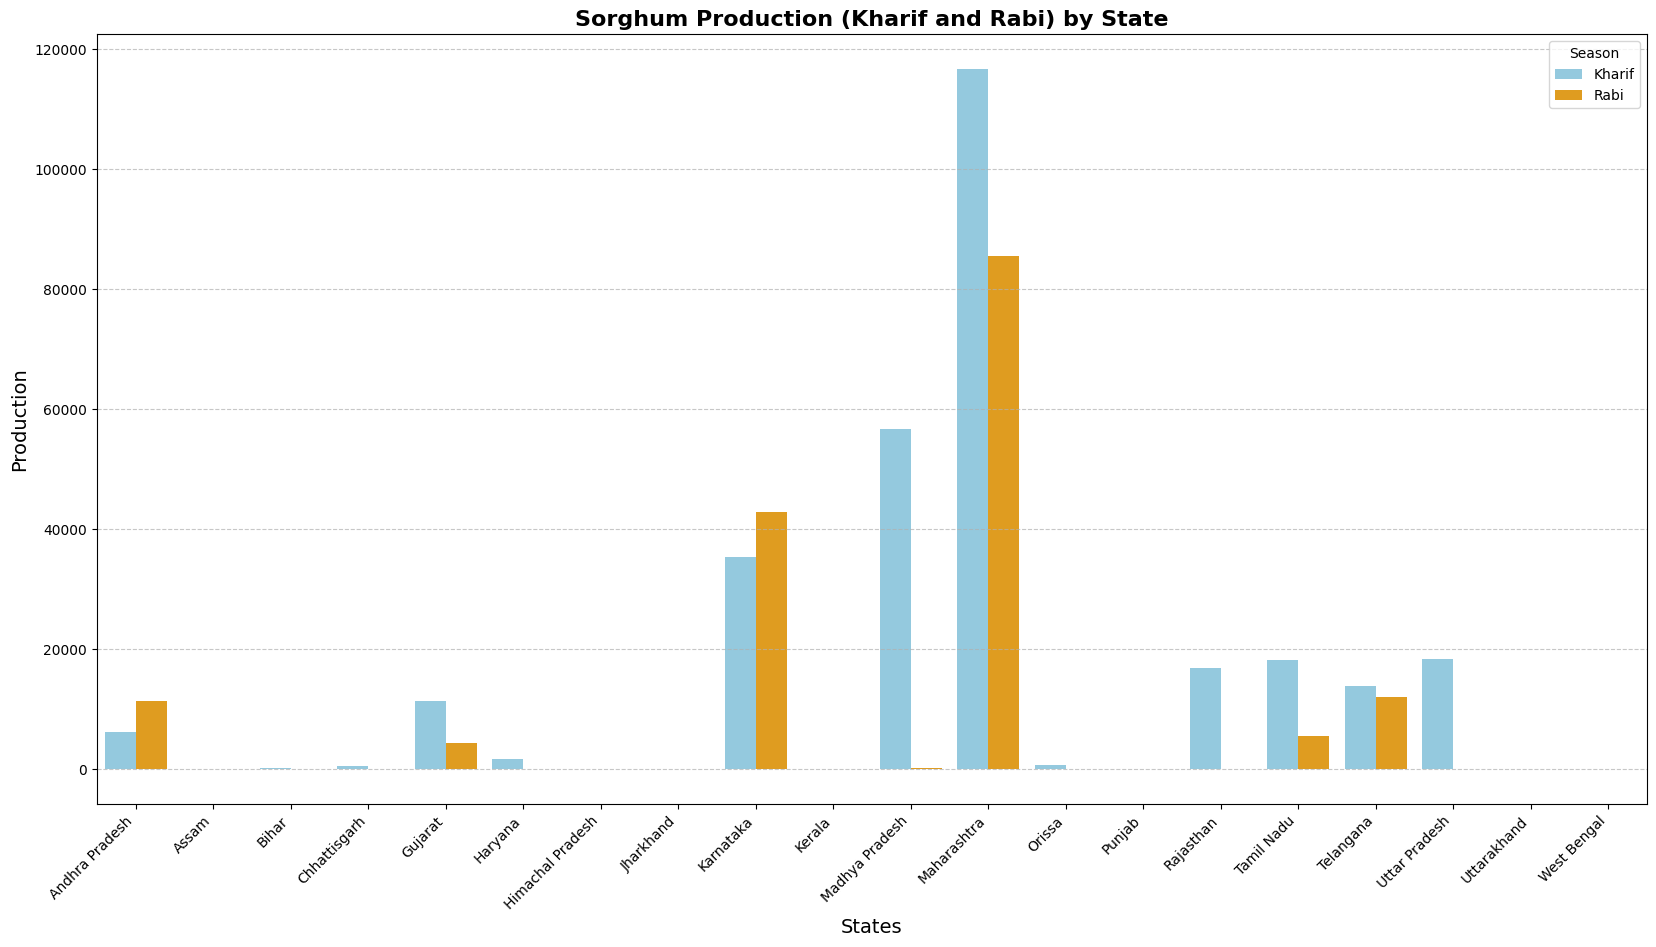

In [21]:
# Grouping Rabi and Kharif production by state
sorghum_production = df.groupby("state_name", as_index=False)[["kharif_sorghum_production", "rabi_sorghum_production"]].sum()

# Reshaping the DataFrame for seaborn
df_melted = sorghum_production.melt(id_vars="state_name", var_name="season", value_name="sorghum_production")

# Mapping season names for better readability
df_melted["season"] = df_melted["season"].replace({
    "kharif_sorghum_production": "Kharif",
    "rabi_sorghum_production": "Rabi"
})

plt.figure(figsize=(20, 10))
sns.barplot(data=df_melted, x="state_name", y="sorghum_production", hue="season", palette=["skyblue", "orange"])

# Adding title and labels
plt.title("Sorghum Production (Kharif and Rabi) by State", fontsize=16, fontweight="bold")
plt.xlabel("States", fontsize=14)
plt.ylabel("Production", fontsize=14)
plt.grid(axis="y", alpha=0.7, linestyle="--")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Season")
plt.show()


Q 11) Top 7 States for Groundnut Production

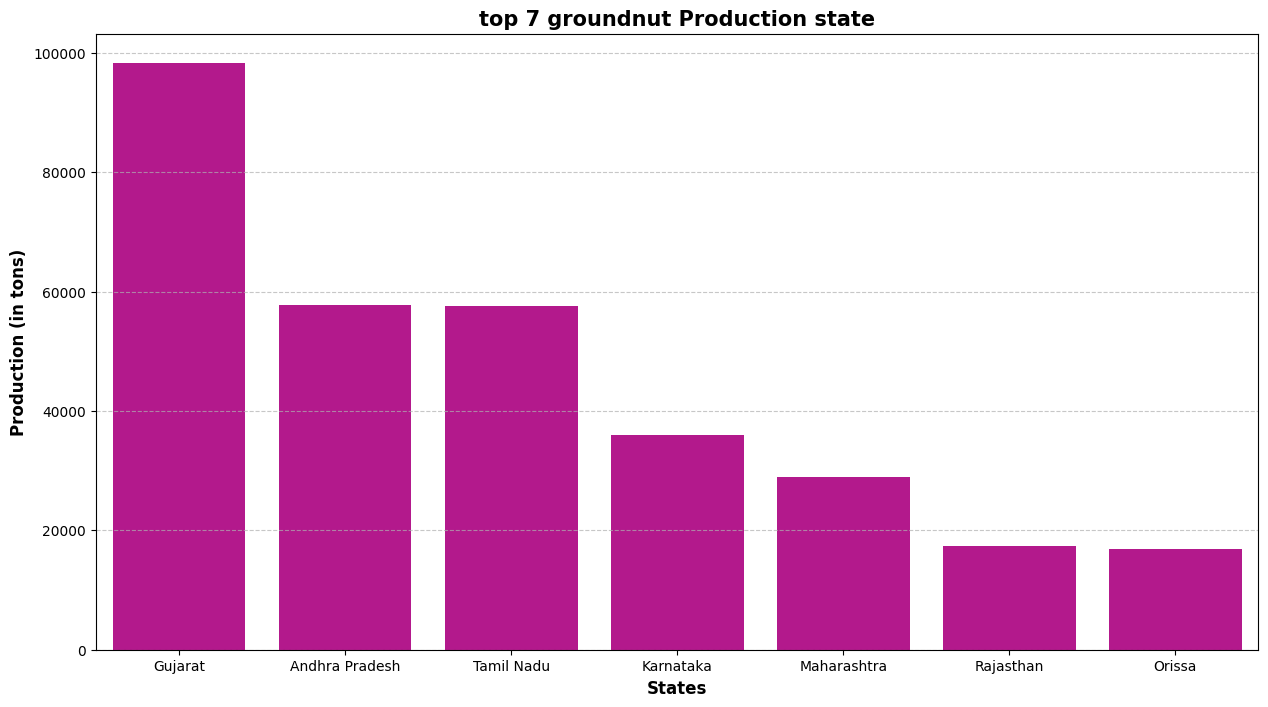

In [122]:
# grouping and sort groundnut production
group_state = df.groupby("state_name", as_index= False)["groundnut_production"].sum()
top_7 = group_state.sort_values("groundnut_production",ascending=False).head(7)

# bar chart
plt.figure(figsize=(15,8))
sns.barplot(data=top_7, x = "state_name", y="groundnut_production",color="#cc0099")
plt.title("top 7 groundnut Production state", weight = "bold",fontsize=15)
plt.xlabel("States",fontsize=12, weight = "bold")
plt.ylabel("Production (in tons)",fontsize=12, weight = "bold")
plt.grid(axis="y", alpha = 0.7, linestyle = "--"  )

Q 12) Soybean Production by Top 5 States and Yield Efficiency

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12152\3240740316.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=get_production_states, x='state_name', y='soyabean_production', palette='rocket')


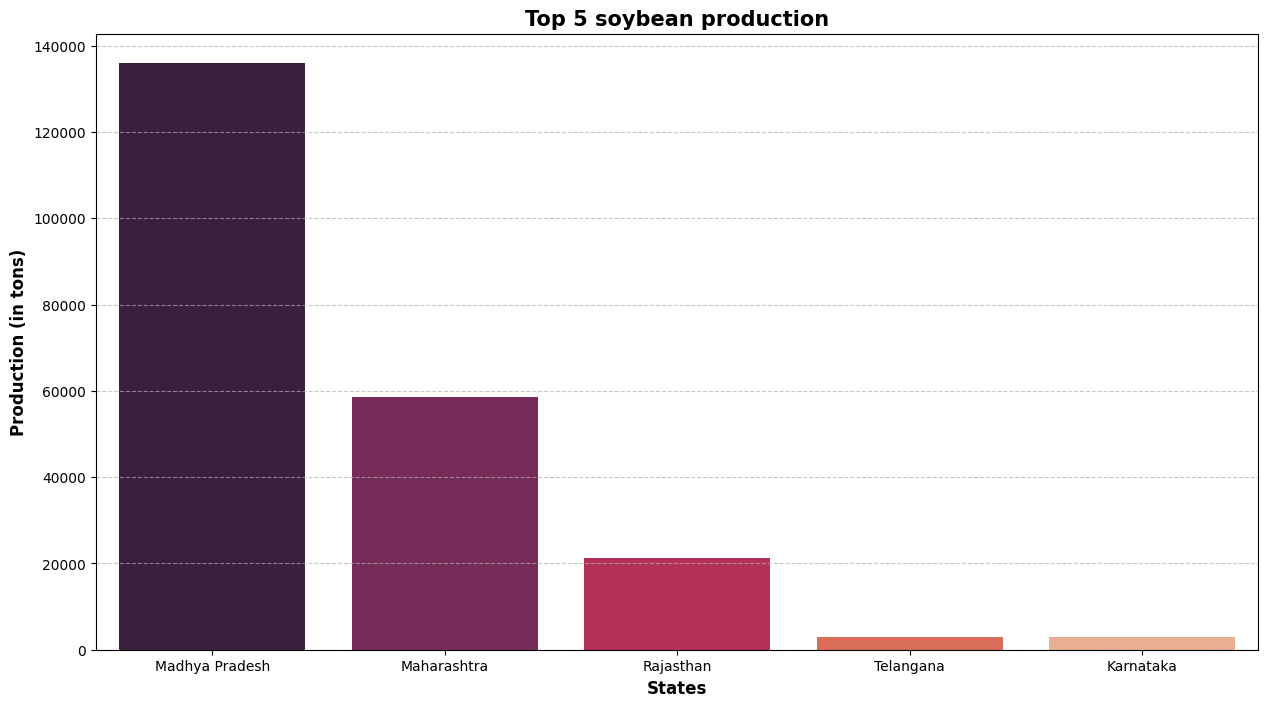

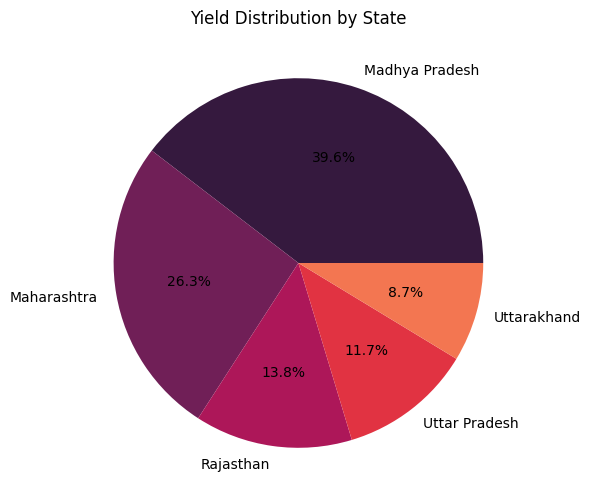

In [21]:
# Get top 5 soybean production states
group_state_production = df.groupby("state_name", as_index=False)["soyabean_production"].sum()
get_production_states = group_state_production.sort_values("soyabean_production", ascending=False).head(5)


# soybean production bar chat
plt.figure(figsize=(15,8))
sns.barplot(data=get_production_states, x='state_name', y='soyabean_production', palette='rocket')
plt.title("Top 5 soybean production", weight = "bold",fontsize=15)
plt.xlabel("States",fontsize=12, weight = "bold")
plt.ylabel("Production (in tons)",fontsize=12, weight = "bold")
plt.grid(axis="y", alpha = 0.7, linestyle = "--"  )


# Get top 5 soybean yield states
group_state_yield = df.groupby("state_name", as_index=False)["soyabean_yield"].sum()
get_yield_states = group_state_yield.sort_values("soyabean_yield", ascending=False).head(5)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    get_yield_states["soyabean_yield"],  # Corrected column name
    autopct='%1.1f%%',
    labels=get_yield_states["state_name"],  # Labels for states
    colors=sns.color_palette("rocket"),
)

plt.title("Yield Distribution by State")
plt.show()


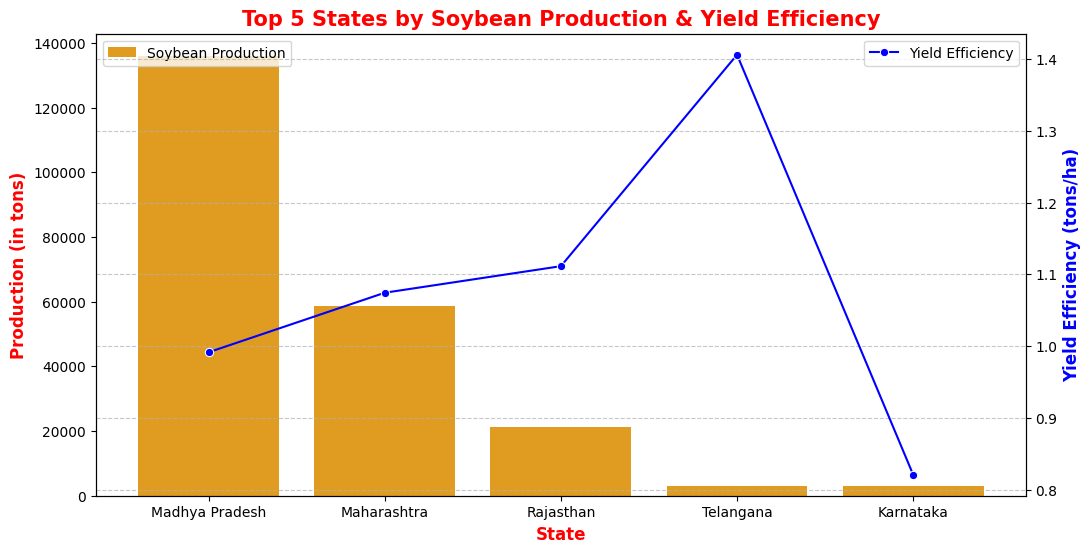

In [25]:
# Group data by state and sum production & area
group_state = df.groupby("state_name", as_index=False).agg({
    "soyabean_production": "sum",
    "soyabean_area": "sum"
})

# Calculate Yield Efficiency
group_state["soyabean_yield_efficiency"] = group_state["soyabean_production"] / group_state["soyabean_area"]

# Select Top 5 States by Soybean Production
top_5_states = group_state.nlargest(5, "soyabean_production")

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart for Production
sns.barplot(data=top_5_states, x="state_name", y="soyabean_production", ax=ax1, color="#FFA500", label="Soybean Production")
ax1.set_ylabel("Production (in tons)", color="red", fontsize=12, weight="bold")

# Line plot for Yield Efficiency (Secondary Y-Axis)
ax2 = ax1.twinx()
sns.lineplot(data=top_5_states, x="state_name", y="soyabean_yield_efficiency", ax=ax2, color="blue", marker="o", label="Yield Efficiency")
ax2.set_ylabel("Yield Efficiency (tons/ha)", color="blue", fontsize=12, weight="bold")

# Labels & Titles
ax1.set_xlabel("State", fontsize=12, weight="bold", color="red")
plt.title("Top 5 States by Soybean Production & Yield Efficiency", fontsize=15, weight="bold", color="red")

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Q 13) Oilseed Production in Major States

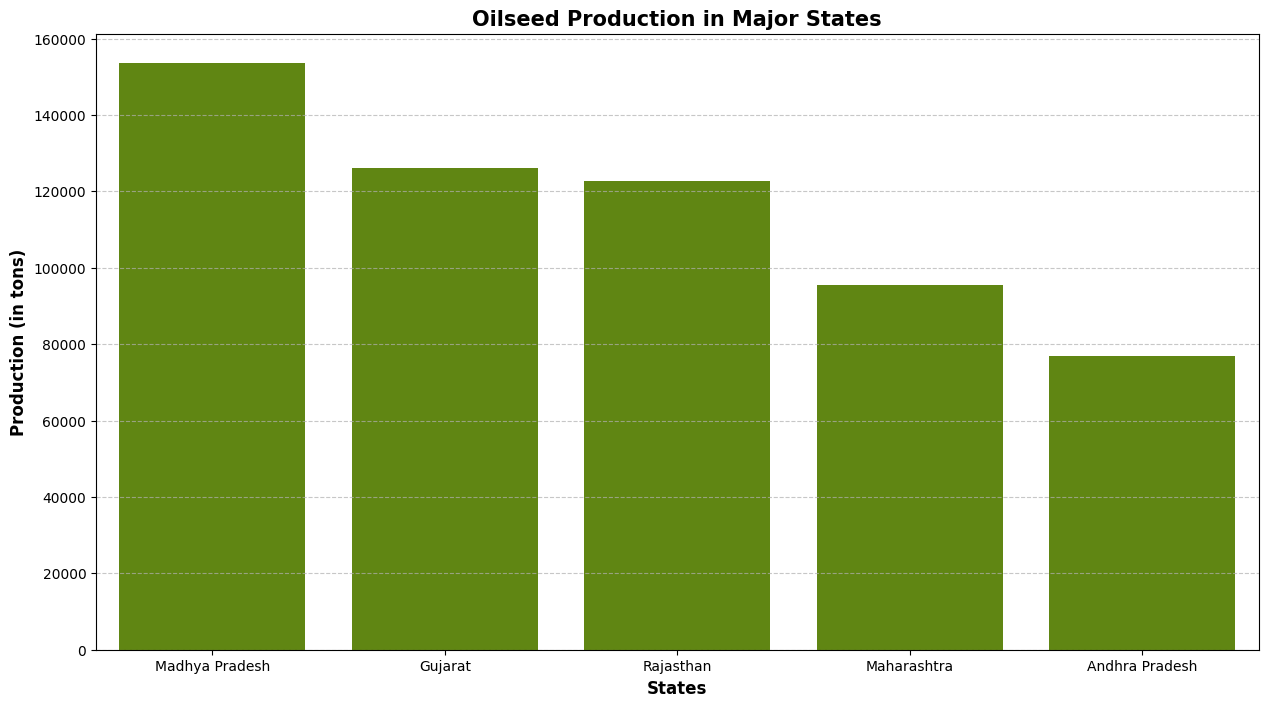

In [127]:
# grouping and sort groundnut production
group_state = df.groupby("state_name", as_index= False)["oilseeds_production"].sum()
major_states = group_state.sort_values("oilseeds_production",ascending=False).head(5)

# bar chart
plt.figure(figsize=(15,8))
sns.barplot(data=major_states, x = "state_name", y="oilseeds_production",color="#669900")
plt.title("Oilseed Production in Major States", weight = "bold",fontsize=15)
plt.xlabel("States",fontsize=12, weight = "bold")
plt.ylabel("Production (in tons)",fontsize=12, weight = "bold")
plt.grid(axis="y", alpha = 0.7, linestyle = "--"  )


Q 14) Impact of Area Cultivated on Production (Rice, Wheat, Maize)



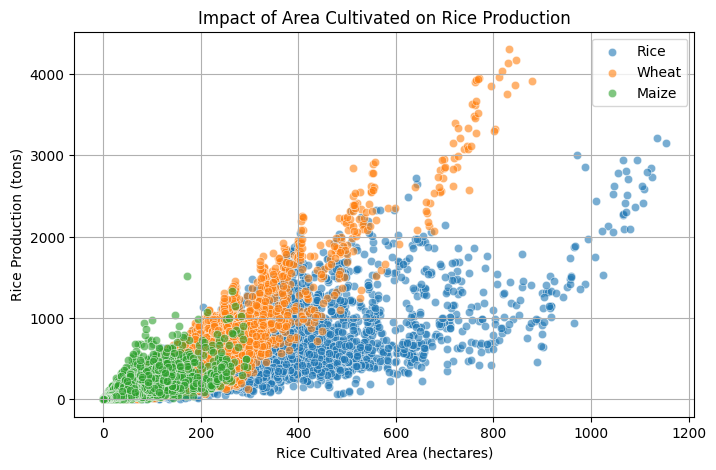

In [10]:
# Scatter Plot 
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="rice_area", y="rice_production", alpha=0.6,label="Rice")
sns.scatterplot(data=df, x="wheat_area", y="wheat_production", alpha=0.6,label="Wheat")
sns.scatterplot(data=df, x="maize_area", y="maize_production", alpha=0.6,label="Maize")
plt.xlabel("Rice Cultivated Area (hectares)")
plt.ylabel("Rice Production (tons)")
plt.title("Impact of Area Cultivated on Rice Production")
plt.grid()
plt.show()


Q 15) Rice vs. Wheat Yield Across States

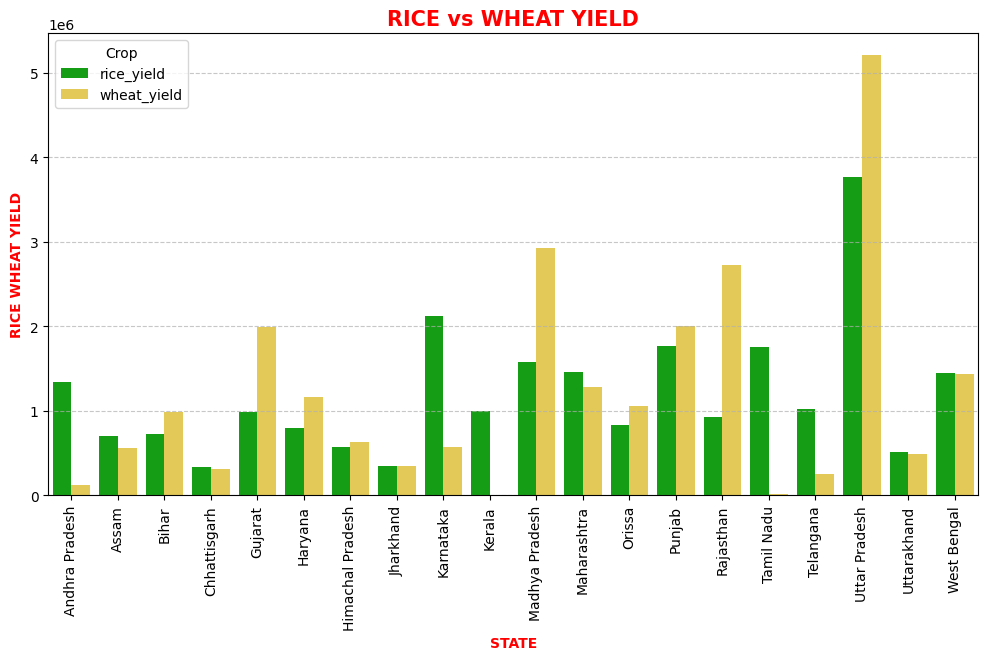

In [3]:
# Grouping the data
group_state = df.groupby("state_name", as_index=False)[['rice_yield', "wheat_yield"]].sum()

# Reshaping the DataFrame for seaborn
df_melted = group_state.melt(id_vars="state_name", var_name="Crop", value_name="Yield")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="state_name", y="Yield", hue="Crop", palette=["#00b300", (250/255, 216/255, 65/255)])

plt.xlabel("STATE", fontsize=10, weight="bold", color="red")
plt.ylabel("RICE WHEAT YIELD", fontsize=10, weight="bold", color="red")
plt.title("RICE vs WHEAT YIELD", fontsize=15, weight="bold", color="red")
plt.xticks(rotation=90)
plt.legend(title="Crop")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


SQL CONNECT


In [5]:
import pymysql

myconnection = pymysql.connect(host = '127.0.0.1', user = 'root', passwd= 'Admin@123')

Create database and Insert the Table

In [ ]:
#Create database on SQL
myconnection.cursor().execute("create database agridata")

#insert Table
df = df
database_name = "agridata"
table_name = "agri_data_table"
dtype_mapping = {
    'int64': 'INTEGER',
    'float64': 'FLOAT',
    'object': 'TEXT',
    'datetime64[ns]': 'DATETIME',
    'bool': 'BOOLEAN'
}
columns = ",".join(f"{col} {dtype_mapping[str(dtype)]}" for col, dtype in zip(df.columns, df.dtypes))

create_table_query = f"CREATE TABLE {database_name}.{table_name} ({columns});"
myconnection.cursor().execute(create_table_query)

for i in range(len(df)):
    values = tuple(map(lambda x: x.item() if isinstance(x, (np.int64, np.float64)) else x, df.iloc[i]))
    myconnection.cursor().execute(f"INSERT INTO {database_name}.{table_name} VALUES {values}")
    myconnection.commit()
    